In [6]:
import pandas as pd
import numpy as np

#allows us to see the charts/graphs within Jupyter Notebook
from matplotlib import pyplot as plt
import seaborn as sns #sits on top of matplotlib

import sklearn
import seaborn as sns  #sits on top of matplotlib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #/data to learn from
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score




%matplotlib inline #allows us to see the charts/graphs within Jupyter Notebook


UsageError: unrecognized arguments: #allows us to see the charts/graphs within Jupyter Notebook


In [7]:
location= "../../datasets/DC_Properties.csv"
#location = r"C:\Users\TPCF235009ur\Documents\Data Analytic Bootcamp\datasets\DC_Properties.csv"
df=pd.read_csv(location, low_memory=False)
df.tail()


#df=pd.read_csv("datasets/DC_Properties.csv")

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
158952,158952,1,0,Forced Air,Y,NaN,3,1,1938.0,2006.0,...,-77.01942,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,0477,-77.019422,38.911848,NW
158953,158953,1,0,Forced Air,Y,NaN,4,2,1938.0,2006.0,...,-77.01942,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,0477,-77.019422,38.911848,NW
158954,158954,2,0,Forced Air,Y,NaN,4,2,1920.0,2007.0,...,-77.01942,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,0477,-77.019422,38.911848,NW
158955,158955,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,...,-77.01823,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,0504,-77.018232,38.872961,SW
158956,158956,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,...,-77.01823,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,0504,-77.018232,38.872961,SW


In [8]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [9]:
#df_no_missing = df.dropna()
#df_no_missing

df_drop=df.drop(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'QUALIFIED', 'SALE_NUM', 
                 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'QUADRANT', 'SQUARE', 'X', 'Y', 'ASSESSMENT_NBHD'], axis=1)
df_drop.tail()


,PRICE,WARD
158952,399900.0,Ward 6
158953,416000.0,Ward 6
158954,600000.0,Ward 6
158955,215100.0,Ward 6
158956,NaN,Ward 6


In [10]:
df_clean=df_drop.loc[df_drop['PRICE'].notnull()]
df_clean.tail()

,PRICE,WARD
158951,389000.0,Ward 6
158952,399900.0,Ward 6
158953,416000.0,Ward 6
158954,600000.0,Ward 6
158955,215100.0,Ward 6


In [ ]:
#sns.lmplot(x='ASSESSMENT_NBHD', y='PRICE', data=df_drop) 

In [11]:
df_clean.count()

PRICE    98216
WARD     98216
dtype: int64

In [12]:
#df_clean.shape()


In [13]:
#sns.swarmplot(x='ASSESSMENT_NBHD', y='PRICE', data=df_clean)

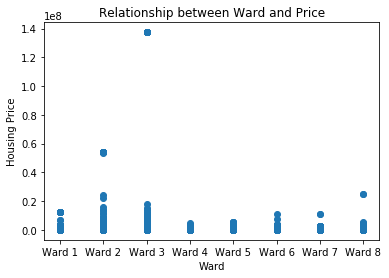

In [14]:
#compare number of rooms to home price
plt.scatter(df_clean['WARD'], df_clean['PRICE']) 
plt.xlabel("Ward") 
plt.ylabel("Housing Price") 
plt.title("Relationship between Ward and Price") 
plt.show()